In [1]:
import pandas as pd

politician_map = pd.read_csv('politopics/conf/map.csv')
handles = politician_map['Handle']

party_colors = []
for party in politician_map['Party']:
    if party == 'Democratic Party':
        party_colors.append('b')
    elif party == 'Republican Party':
        party_colors.append('r')
    else:
        party_colors.append('k')

In [4]:
from politopics.preprocess import *

n_tweets = 0
handle_objs = []
for handle in handles:
    try:  
        handle_obj = Preprocess(handle)
        handle_objs.append(handle_obj)
        n_tweets += len(handle_obj.tweets)
    except ValueError:
        continue

02/15/2020 10:23:31 PM | INFO | Processing Tweets from RepFinkenauer
02/15/2020 10:23:32 PM | INFO | Processing Tweets from RepSpanberger
02/15/2020 10:23:32 PM | INFO | Processing Tweets from RepKinzinger
02/15/2020 10:23:33 PM | INFO | Processing Tweets from RepAdamSchiff
02/15/2020 10:23:33 PM | INFO | Processing Tweets from RepAdrianSmith
02/15/2020 10:23:33 PM | INFO | Processing Tweets from RepEspaillat
02/15/2020 10:23:34 PM | INFO | Processing Tweets from RepAlGreen
02/15/2020 10:23:34 PM | INFO | Processing Tweets from RepLowenthal
02/15/2020 10:23:35 PM | INFO | Processing Tweets from RepSires
02/15/2020 10:23:35 PM | INFO | Processing Tweets from RepAOC
02/15/2020 10:23:35 PM | INFO | Processing Tweets from SenAmyKlobuchar
02/15/2020 10:23:36 PM | INFO | Processing Tweets from RepAndreCarson
02/15/2020 10:23:36 PM | INFO | Processing Tweets from RepAndyBarr
02/15/2020 10:23:36 PM | INFO | Processing Tweets from RepAndyLevin
02/15/2020 10:23:37 PM | INFO | Processing Tweets f

02/15/2020 10:24:24 PM | INFO | Processing Tweets from RepSwalwell
02/15/2020 10:24:25 PM | INFO | Processing Tweets from RepRooney
02/15/2020 10:24:25 PM | INFO | Processing Tweets from RepFrankLucas
02/15/2020 10:24:25 PM | INFO | Processing Tweets from FrankPallone
02/15/2020 10:24:26 PM | INFO | Processing Tweets from RepFredUpton
02/15/2020 10:24:26 PM | INFO | Processing Tweets from RepFrenchHill
02/15/2020 10:24:27 PM | INFO | Processing Tweets from RepGarretGraves
02/15/2020 10:24:27 PM | INFO | Processing Tweets from USRepGaryPalmer
02/15/2020 10:24:27 PM | INFO | Processing Tweets from SenGaryPeters
02/15/2020 10:24:28 PM | INFO | Processing Tweets from RepGilCisneros
02/15/2020 10:24:29 PM | INFO | Processing Tweets from RepGrothman
02/15/2020 10:24:29 PM | INFO | Processing Tweets from RepGraceMeng
02/15/2020 10:24:30 PM | INFO | Processing Tweets from RepGregPence
02/15/2020 10:24:30 PM | INFO | Processing Tweets from RepGregStanton
02/15/2020 10:24:30 PM | INFO | Processi

02/15/2020 10:25:20 PM | INFO | Processing Tweets from SenatorHassan
02/15/2020 10:25:20 PM | INFO | Processing Tweets from RepVeasey
02/15/2020 10:25:21 PM | INFO | Processing Tweets from marcorubio
02/15/2020 10:25:21 PM | INFO | Processing Tweets from RepMarcyKaptur
02/15/2020 10:25:21 PM | INFO | Processing Tweets from SenatorCantwell
02/15/2020 10:25:22 PM | INFO | Processing Tweets from MarioDB
02/15/2020 10:25:22 PM | INFO | Processing Tweets from RepDeSaulnier
02/15/2020 10:25:23 PM | INFO | Processing Tweets from RepMarkGreen
02/15/2020 10:25:24 PM | INFO | Processing Tweets from RepMarkMeadows
02/15/2020 10:25:24 PM | INFO | Processing Tweets from repmarkpocan
02/15/2020 10:25:24 PM | INFO | Processing Tweets from RepMarkTakano
02/15/2020 10:25:25 PM | INFO | Processing Tweets from RepMarkWalker
02/15/2020 10:25:25 PM | INFO | Processing Tweets from MarkWarner
02/15/2020 10:25:26 PM | INFO | Processing Tweets from RepMullin
02/15/2020 10:25:27 PM | INFO | Processing Tweets fr

02/15/2020 10:26:15 PM | INFO | Processing Tweets from RepSylviaGarcia
02/15/2020 10:26:15 PM | INFO | Processing Tweets from SenatorBaldwin
02/15/2020 10:26:16 PM | INFO | Processing Tweets from SenDuckworth
02/15/2020 10:26:16 PM | INFO | Processing Tweets from RepTedBudd
02/15/2020 10:26:17 PM | INFO | Processing Tweets from SenTedCruz
02/15/2020 10:26:17 PM | INFO | Processing Tweets from RepTedLieu
02/15/2020 10:26:18 PM | INFO | Processing Tweets from RepTedYoho
02/15/2020 10:26:18 PM | INFO | Processing Tweets from SenThomTillis
02/15/2020 10:26:19 PM | INFO | Processing Tweets from RepThomasMassie
02/15/2020 10:26:19 PM | INFO | Processing Tweets from RepTimBurchett
02/15/2020 10:26:19 PM | INFO | Processing Tweets from timkaine
02/15/2020 10:26:20 PM | INFO | Processing Tweets from RepTimRyan
02/15/2020 10:26:20 PM | INFO | Processing Tweets from SenatorTimScott
02/15/2020 10:26:21 PM | INFO | Processing Tweets from SenTinaSmith
02/15/2020 10:26:21 PM | INFO | Processing Tweet

In [5]:
print(f'{n_tweets} tweets processed.')

187040 tweets processed.


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import rbf_kernel
from scipy.sparse.linalg import eigs
from sklearn.metrics.pairwise import cosine_similarity

def diffusion_map(key_terms_str, power, eps):
    tfidf = TfidfVectorizer()
    td_matrix = tfidf.fit_transform(key_terms_str)

    D = cosine_similarity(td_matrix, dense_output=False)
    D = D.power(power)

    eps = eps
    A = rbf_kernel(D, gamma=1./(2.*eps))
    W, V = eigs(A)
    return(W, V)

Text(0.5, 1.0, 't = 2, $\\epsilon$ = 6')

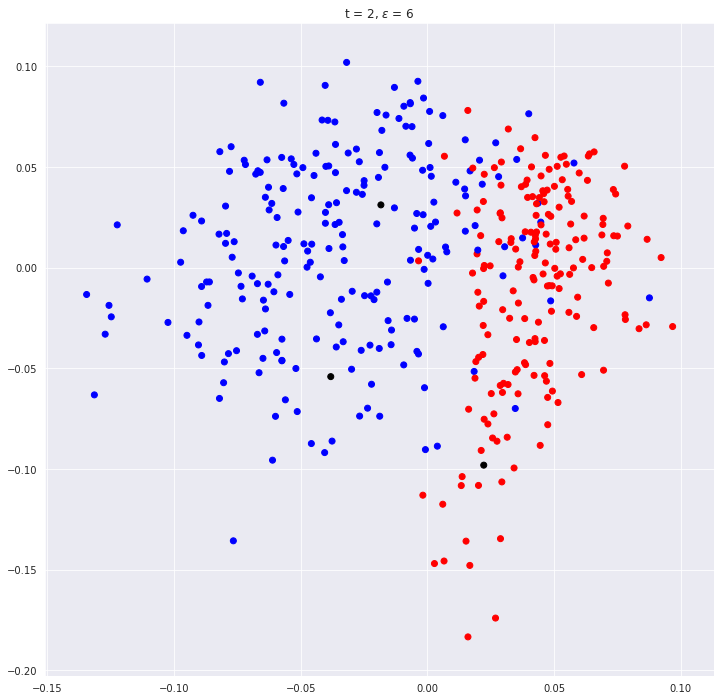

In [8]:
key_terms_str = [ ' '.join(handle_obj.n_key_terms) for handle_obj in handle_objs ]
W, V = diffusion_map(key_terms_str, 2, 6)

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sb

fig = plt.figure(figsize=(12,12))
sb.set_style('darkgrid')
plt.axis(scaled=True)
x = V[:,1]; y = V[:,2]
plt.scatter(x, y, c=party_colors)
plt.title('t = 2, $\epsilon$ = 6')

In [9]:
import itertools

power = [1, 5, 10]
eps   = [2, 8, 16]
params = [xs for xs in itertools.product(power, eps)]
print(params)

[(1, 2), (1, 8), (1, 16), (5, 2), (5, 8), (5, 16), (10, 2), (10, 8), (10, 16)]


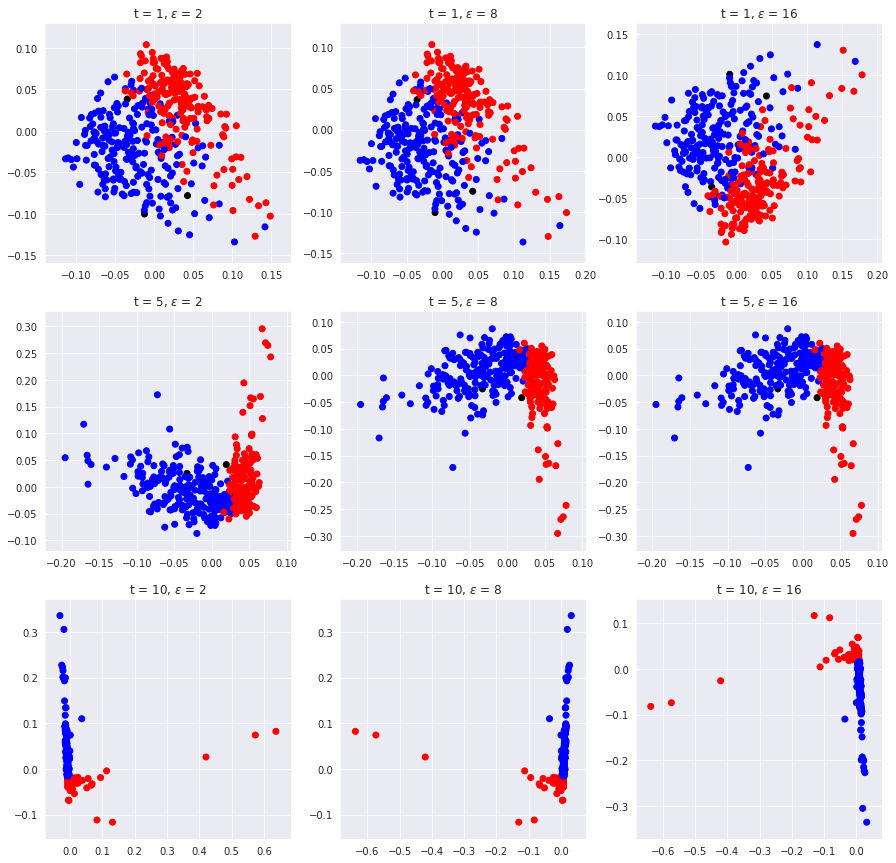

In [10]:
sb.set_style('darkgrid')
fig = plt.figure(figsize=(15,15))

for i, param in enumerate(params):
    power = param[0]
    eps   = param[1]
    W, V = diffusion_map(key_terms_str, power, eps )
    x = V[:,1]; y = V[:,2]
    plt.subplot(3, 3, i+1)
    plt.scatter(x, y, c=party_colors)
    plot_title = ', '.join(['t = ' + str(power), '$\epsilon$ = ' + str(eps)])
    plt.title(plot_title)

plt.show()